<a href="https://colab.research.google.com/github/13693763686/data-analysis/blob/master/scikit-learn%20notebooks/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#贝叶斯方法

In [1]:
#机器学习分频率派和贝叶斯派
#频率派认为参数是给定的，但是未知，而贝叶斯认为参数本身也是随机变量
#频率派的求解通常是减少loss或者最大似然的优化问题，而贝叶斯通常来说是关于后验概率的建模问题
#对于先验和后验的建模过程，一套共轭的理论是需要的
#对于贝叶斯派，它严格的根据统计的视角，出现了比较理论化的概率图模型来对变量之间的关系建模和求解
#贝叶斯方法即指概率建模方法，利用贝叶斯公式，而朴素贝叶斯是一个泛化的假设，即一个高维随机变量的各个变量之间是独立的，对应机器学习来说
#就是每一个样本内的特征之间独立，这样的话，在进行概率建模的时候，计算会很方便。
#贝叶斯方法最大的好处就是它是纯的概率模型，它的计算出来的值确实是有概率的含义的
#对于逻辑回归和svm的归一化来说，都是一种压缩的方法，尽管逻辑回归的推导从贝叶斯的推导过程也可以看出它是概率，但是不太明显

##Sklearn中的朴素贝叶斯建模方法

In [2]:
#朴素贝叶斯泛指一种假设的前提
#对于参数的先验，似然是需要认为的假设的，当然它们的设定可以用某种函数来简化计算的处理
#这里我们利用高斯贝叶斯来进行学习，里面的参数可以指的先验的分布

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [4]:
digits = load_digits() #手写数据集
X, y = digits.data, digits.target

In [5]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [6]:
X.shape

(1797, 64)

In [7]:
#查看分类问题分为几类
np.unique(Ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
acc_score = gnb.score(Xtest,Ytest)

In [10]:
Y_pred = gnb.predict(Xtest)

In [11]:
#预测结果的概率显示
prob = gnb.predict_proba(Xtest)

In [12]:
#利用混淆矩阵检查一下预测的效果，这时候的recall和FPR的计算就没有意义了
from sklearn.metrics import confusion_matrix as CM

In [13]:
#注意参数的顺序
CM(Ytest,Y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]])

In [14]:
#下面演示机器学习中常用的路线，学习曲线，横坐标为样本个数
#由于其常用性，sklearn提供了专门的函数来解决这类问题learning-curve
#整个函数返回训练的数据集的大小，分数和test的分数，下面进行演示

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve #画学习曲线的类
from sklearn.model_selection import ShuffleSplit #设定交叉验证模式的类
from time import time
import datetime

In [33]:
def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,n_jobs=n_jobs)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    #在下面的单独测试中可以看到具体的解释过程
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [34]:
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"]
model = [GaussianNB(),DTC(),SVC(gamma=0.001)
         ,RFC(n_estimators=50),LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

In [35]:
#这里单独演示一下learning_curve的用法
train_sizes, train_scores, test_scores = learning_curve(model[0], X, y,cv=cv)                                                   

In [36]:
test_scores.shape

(5, 50)

In [37]:
train_sizes.shape
#由这个结果可以非常显著地看出，我们的训练集的数目取了五次，然后因为分了50个split，因此有五十次的训练分数
#因此，当我们计算单个样本数目的分数时，一定要对axis=1的地方求解

(5,)

Naive Bayes:00:04:025860
DecisionTree:00:02:849895
SVM, RBF kernel:00:22:788622
RandomForest:00:28:919503
Logistic:00:23:247356


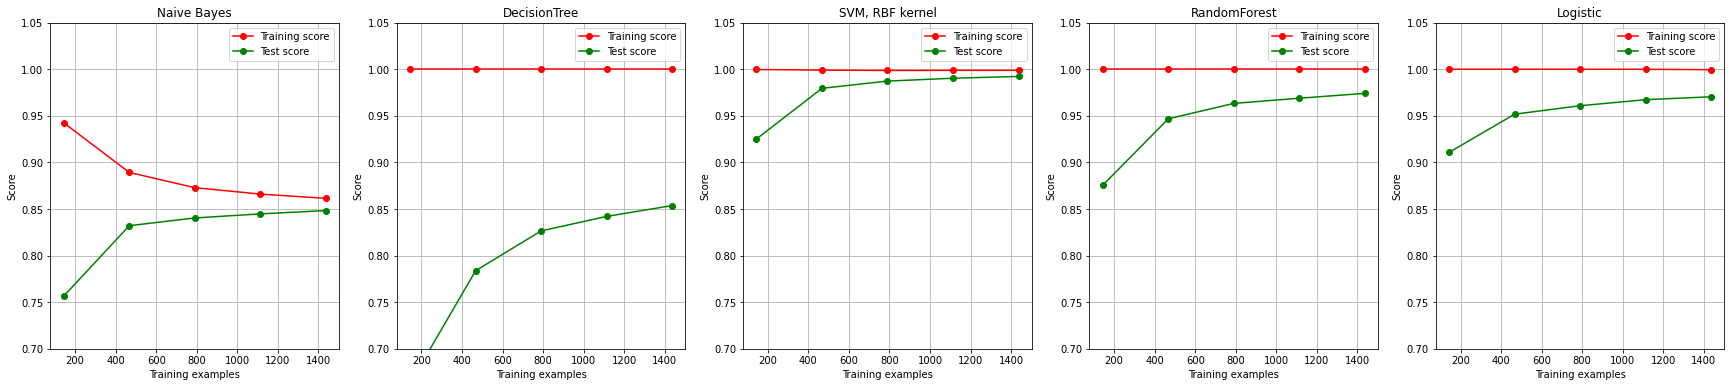

In [38]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind, title_, estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                        ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

In [39]:
#由图中可以观察到，几乎出来朴素贝叶斯方法，所有的其它算法都可以保证训练数据的完全拟合，这通常是基础的要求
#对于其它模型，当样本数量逐渐增多，整体样本的泛化误差会减少
#而对于朴素贝叶斯模型来说，就比较奇怪，可以观察到训练集分数下降的过程中测试集的分数却上升了
#也就是说朴素贝叶斯放弃了训练集的拟合结果为了达到更好的测试集的结果

##概率型结果的评判

###布里尔分数

In [40]:
#由于返回值不再是类别，也不是连续的实数，而是一个0-1之间的概率值，因此我们要考虑如何评判好坏的问题
#最简单的想法就是和残差的计算方法一致，直接平方就和即可，而且这种计算方法的误差具有上界1，因此可以利用值的大小直接判断好坏，类似于ROC
#这种简单的思想就是Brier Score

In [48]:
from sklearn.metrics import brier_score_loss

In [57]:
#recap prob是每一个数字的可能性
Ytest[:5]
#prob.shape

array([6, 1, 3, 0, 4])

In [ ]:
#注意对应每一个预测结果，我们预测的类别有10类，标签只有一个，针对某一个标签的预测程度可以通过pos_label单独指定作为计算的基础值
#注意这种简单的理解思路已经在新版的scikit-learn中被修复了，因为类别之间的大小是一致的，而不是ordinal variable体现出来的差距
#因此这里我们的计算也是没有意义的
brier_score_loss(Ytest,prob[:,1],pos_label=1)

In [63]:
#与逻辑回归和神经网络对应的交叉损失一致，我们也可以通过计算对数损失来衡量模型的能力
#对应对数损失来讲，由于SVC和逻辑回归都是有优化目标的，且逻辑回归的优化目标就是对数损失，因此它的表现会更好
#对于何种损失的建议
#布里尔分数显然更加直观和可解释，且具有界限，相对来说，对数损失的解释，计算都相对复杂一些

###概率校准曲线

In [69]:
#由于贝叶斯方法的概率建模，它的参数几乎没有可以调节的地步，我们可以通过概率校准的方式来改善其结果
#概率校准曲线也叫可靠性曲线可以衡量我们模型的好坏
#如果对于标签的认识本来就是概率型的话，那么横坐标为预测概率，纵坐标为实际概率的图像，当图像沿对角线的时候效果最好
#因此沿着这个角度，我们可以通过一定的概率结果校准使结果靠向我们的对角线的图像
#但是问题出在实际的概率怎么计算，对于观察结果来说我们是只能看到标签的情况的，这时候我们便考虑分箱，以箱子的概率为真实概率
#下面我们可以调用sklearn中的内置函数帮助我们解决这个问题

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

In [71]:
X, y = mc(n_samples=100000,n_features=20 #总共20个特征
          ,n_classes=2 #标签为2分类
          ,n_informative=2 #其中两个代表较多信息
          ,n_redundant=10 #10个都是冗余特征
          ,random_state=42)

In [72]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y
                          ,test_size=0.99 #训练集会很小，测试集会很大
                          ,random_state=42)

In [73]:
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
y_pred = gnb.predict(Xtest)
prob_pos = gnb.predict_proba(Xtest)[:,1] #我们的预测概率 - 横坐标
clf_score = gnb.score(Xtest,Ytest)
#Ytest - 我们的真实标签 - 横坐标

In [74]:
from sklearn.calibration import calibration_curve

In [75]:
#calibration curve会根据我们的标签和概率为我们准备好作图所需的数据，类似于learning curve
trueproba, predproba = calibration_curve(Ytest, prob_pos, n_bins=10)

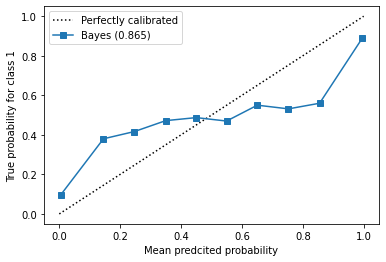

In [77]:
#下面根据得到的数据绘制校准曲线
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

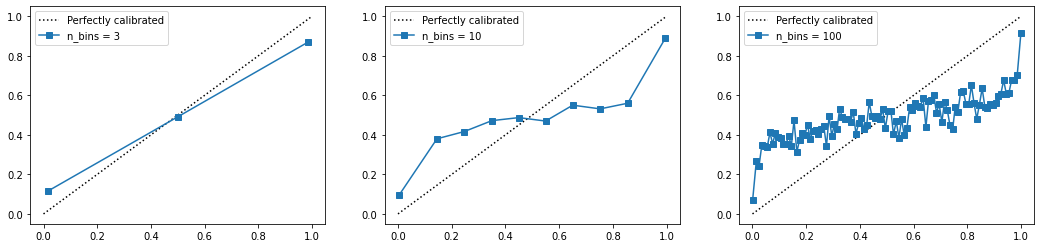

In [79]:
#下面探究不同的箱子的个数对图像的准确度的影响
fig, axes = plt.subplots(1,3,figsize=(18,4))
for ind,i in enumerate([3,10,100]):
    ax = axes[ind]
    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=i)
    ax.plot(predproba, trueproba,"s-",label="n_bins = {}".format(i))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax.legend()
plt.show()
#又图像可以观察出10个是比较好的选择，实际的工作中可以多次尝试以获得比较好的结果
#判断标准就是能有趋势，然后线条比较连续，平滑

In [80]:
#下面探究不同的概率模型在概率校准曲线下的图像形状，研究它们的效果
name = ["GaussianBayes","Logistic","SVC"]

gnb = GaussianNB()
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
svc = SVC(kernel = "linear",gamma=1) #置信度

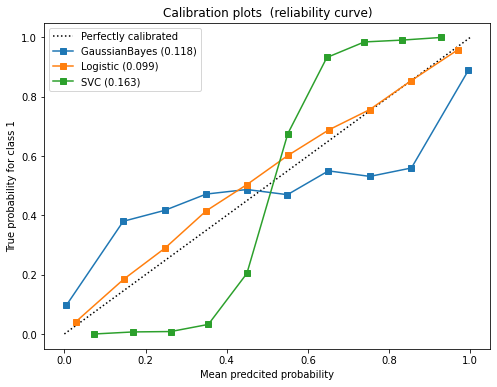

In [81]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    #返回布里尔分数，作为布里尔分数和概率校准曲线的比较
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=10)
    ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
    
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
ax1.set_title('Calibration plots  (reliability curve)')
plt.show()

In [82]:
#由以上的图像可以看出
#首先逻辑回归的布里尔分数最小，然后是朴素贝叶斯，然后是SVC的model
#从图像上来看，可以发现逻辑回归的效果最好，它几乎贴着完美的曲线，因此逻辑回归是比较好的处理概率的方法，评分卡模型的应用
#看朴素贝叶斯的结果，对于概率在0.5之下的箱子，发现预测概率总是低于应该的概率，即把概率压低以获得比较好的结果，同理对于大于0.5的情况，将概率提高增加可靠性
#对于SVC来说，恰好相反，SVC会把概率提高和降低，这样的话会使概率几乎落在0.5附近，这样的决策的不确定性就十分的大，因此预测效果不会太好
#下面用预测概率的直方图探究我们的分析是否正确

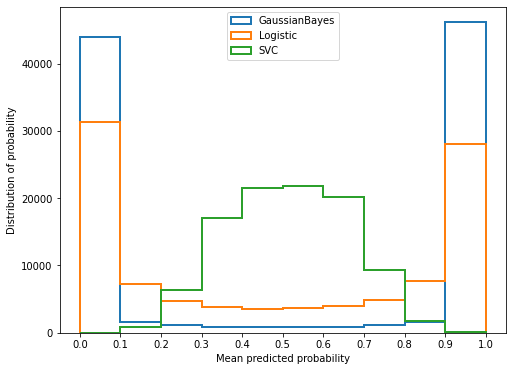

In [85]:
fig, ax2 = plt.subplots(figsize=(8,6))

for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    #hist函数用来做直方图
    ax2.hist(prob_pos #预测概率
             ,bins=10
             ,label=name_
             ,histtype="step" #设置直方图为透明
             ,lw=2 #设置直方图每个柱子描边的粗细
            )
    
ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05, 1.05])
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend(loc=9)
plt.show()

In [86]:
#由图像可以看出，大部分的SVC的概率集中在0.5的位置
#对于逻辑回顾和贝叶斯的方法，相对结果就好很多

In [87]:
#根据这些概率图像，我们可以通过某种校准办法，使概率值更加地靠近标准的曲线，这就是下面的我们的方法
#sklearn中有专门的校准函数，具体的数学原理就不再深究
from sklearn.calibration import CalibratedClassifierCV

In [88]:
name = ["GaussianBayes","Logistic","Bayes+isotonic","Bayes+sigmoid"]

gnb = GaussianNB()

models = [gnb
          ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
        #定义两种校准方式
          ,CalibratedClassifierCV(gnb, cv=2, method='isotonic')
          ,CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

In [89]:
#下面通过作图的方式来观察校准后的结果，首先将原来做出可靠性曲线和预测概率直方图的函数进行保证
def plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest,n_bins=10):
    
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    for clf, name_ in zip(models,name):
        #第一部分是用来做可靠性曲线
        clf.fit(Xtrain,Ytrain)
        y_pred = clf.predict(Xtest)
        #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:,1]
        else:  # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        #返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=n_bins)
        ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        #这一部分是用来做直方图，一行代码就足够了
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_,histtype="step",lw=2)
    
    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

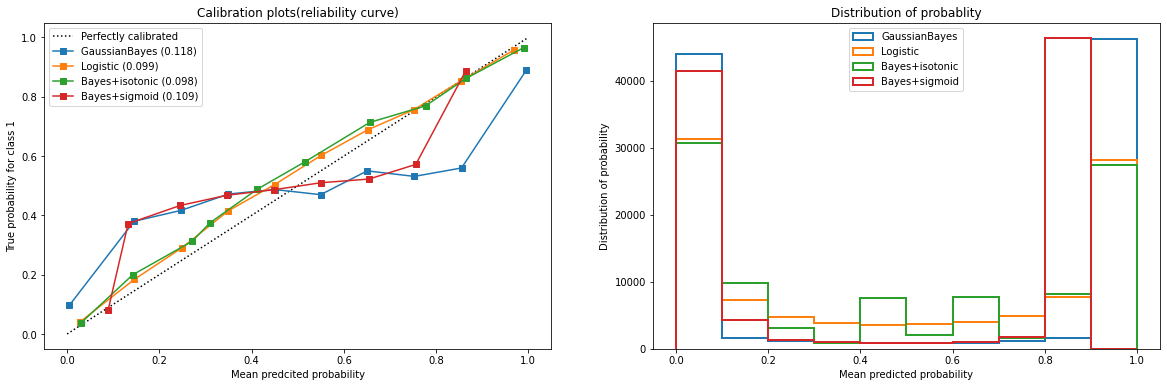

In [90]:
#下面开始通过图的方式进行展示
plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest)

In [91]:
#由图像可以观察到，几乎所有的线都在向45度的线进行倾斜，向内收拢
#从直方图来看，所有的结果都在压低中间的概率，而增加两端的概率
#发现在istonic校准下的曲线几乎和逻辑回归保持了一致
#校准后的结果都变好了，但是这是对于概率的角度，但是对于分类来讲的话是什么样的结果

In [92]:
name_svc = ["SVC","SVC+isotonic","SVC+sigmoid"]

svc = SVC(kernel = "linear",gamma=1)

models_svc = [svc
              ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
              ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]

for clf, name in zip(models_svc,name_svc):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    score = clf.score(Xtest,Ytest)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

SVC:
	Brier:0.1630
	Accuracy:0.8633
SVC+isotonic:
	Brier:0.0999
	Accuracy:0.8639
SVC+sigmoid:
	Brier:0.0987
	Accuracy:0.8634


In [93]:
#由上面的结果观察到，概率的校准是越来越好，但是精确率的表现却并不是如此
#对于SVC来讲，它不是基于该概率判断的，因此调整的方式可能会导致错误率增大
#对于朴素贝叶斯来讲，我们的概率调整使概率更加地偏向样本，当面对测试集不同的概率分布时，则情况不太一致

##多项式贝叶斯

In [94]:
#多项式贝叶斯指给定标签后的每个特征属于多项式分布，不同特征之间是独立的
#下面从文本话题分类的角度来进行理解，这时候各个参数的估计都更加的直接

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss

In [99]:
class_1 = 500 
class_2 = 500 #两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [0.5, 0.5] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [100]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                          ,test_size=0.3
                          ,random_state=420)

In [101]:
#The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).
#The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.
#tf-idf has probability as the number
mms = MinMaxScaler().fit(Xtrain) #训练集上来实例化和训练我们的模型
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [102]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)
#mnb.feature_log_prob

In [107]:
#来试试看把Xtiain转换成分类型数据，根据一般的文本模型的角度建模
#注意我们的Xtrain没有经过归一化，因为做哑变量之后自然所有的数据就不会又负数了
from sklearn.preprocessing import KBinsDiscretizer #对连续性变量进行分箱
#分箱的过程会记录顺序，因此顺序一定要弄清楚
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)

In [108]:
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest)

In [109]:
Xtrain_.shape

(700, 20)

In [110]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [111]:
#观察到分数十分的高，也就是说多项式贝叶斯在文本类模型上的结果比较好
mnb.score(Xtest_,Ytest)

0.9966666666666667

##伯努利贝叶斯

In [112]:
#现在的理解，仔细地理解还是需要看一下Stanford的公开课
#伯努利贝叶斯对所有词进行同时建模，即一条句子就是一个试验
#对于多项式的贝叶斯来说，每一个词单独建模，它具有一个概率，而句子就是n次独立的试验

In [113]:
from sklearn.naive_bayes import BernoulliNB

In [114]:
#设置二值化阈值为0.5
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_, Ytrain)
bnl.score(Xtest_,Ytest)

0.9966666666666667

In [115]:
##观察到效果非常好，现在可以再取一个模型与它比较
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [116]:
rfc = RandomForestClassifier(n_estimators=100)
svm = SVC(kernel="rbf",gamma=1)

In [118]:
rfc = rfc.fit(Xtrain_,Ytrain)
rfc.score(Xtest_,Ytest)

0.9966666666666667

In [119]:
svm = svm.fit(Xtrain_,Ytrain)
svm.score(Xtest_,Ytest)

0.9966666666666667

In [120]:
#观察到三个模型的分数一致，也就是说贝叶斯方法在离散之后的分类的效果特别好

##不均衡样本的贝叶斯方法

In [122]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC

In [123]:
class_1 = 50000 #多数类为50000个样本
class_2 = 500 #少数类为500个样本 1%
centers = [[0.0, 0.0], [5.0, 5.0]] #设定两个类别的中心
clusters_std = [3, 1] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [124]:
name = ["Multinomial","Gaussian","Bernoulli"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB()]

In [126]:
for name,clf in zip(name,models):
    #分测试集和训练集
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                              ,test_size=0.3
                              ,random_state=420)
    #预处理
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    
    #拟合&结果
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest) #准确率
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987


In [129]:
#由上面的结果可以看出，召回率都不太令人满意，因此我们渴望新的方式，能够更好地处理不平衡的样本

In [128]:
#利用互补贝叶斯方法来解决样本不均衡的问题
#通过对比看结果
from sklearn.naive_bayes import ComplementNB
from time import time
import datetime

name = ["Multinomial","Gaussian","Bernoulli","Complement"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]

for name,clf in zip(name,models):
    times = time()
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                              ,test_size=0.3
                              ,random_state=420)
    #预处理
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
00:00:049008
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
00:00:028771
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
00:00:048505
Complement
	Brier:0.038
	Accuracy:0.953
	Recall:0.987
	AUC:0.991
00:00:047547


In [130]:
#由上面的结果可以看出互补贝叶斯通过牺牲精确度，达到了很高的recall
#这在异常检测中的应用是非常可观的

##文本分类案例

###文本编码技术

In [134]:
#机器学习算法可以处理的数据应该是数字
#对于文本处理来讲，我们必须对其编码
#单词编码和文本编码
#最简单的方式就是对出现的单词进行onehot的编码即可，注意多设一个unk
#但是对于单词来说，所需要的向量过长，因此这样是不可靠的
#由此我们还可以有其它的编码方式，3个3个为一个编码单位
#对于文本编码来讲，通常我们会记录所有单词，然后计算出现次数为特征值，构建一个向量

In [135]:
sample = ["Machine learning is fascinating, it is wonderful"
          ,"Machine learning is a sensational techonology"
          ,"Elsa is a popular character"]

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
vec = CountVectorizer()

In [138]:
X = vec.fit_transform(sample)

In [146]:
#利用df查看稀疏矩阵的值
import pandas as pd
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,character,elsa,fascinating,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0,0,1,2,1,1,1,0,0,0,1
1,0,0,0,1,0,1,1,0,1,1,0
2,1,1,0,1,0,0,0,1,0,0,0


In [148]:
#我们也可以进行tfidf的转换
#原理放到后面需要仔细学习，大致就是把常出现的无用词汇的频率给压缩了，避免不必要的影响，因为这种词对话题分类没有影响
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
vec = TFIDF()

In [149]:
X = vec.fit_transform(sample)

###案例数据获取

In [150]:
from sklearn.datasets import fetch_20newsgroups

In [151]:
data = fetch_20newsgroups()

In [152]:
categories = ["sci.space" #科学技术 - 太空
              ,"rec.sport.hockey" #运动 - 曲棍球
              ,"talk.politics.guns" #政治 - 枪支问题
              ,"talk.politics.mideast"] #政治 - 中东问题

train = fetch_20newsgroups(subset="train",categories = categories)
test = fetch_20newsgroups(subset="test",categories = categories)

In [157]:
train.target[:5]

array([0, 1, 3, 1, 1])

###模型搭建


In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

In [159]:
Xtrain = train.data
Xtest = test.data
Ytrain = train.target
Ytest = test.target

In [160]:
tfidf = TFIDF().fit(Xtrain)
Xtrain_ = tfidf.transform(Xtrain)
Xtest_ = tfidf.transform(Xtest)

In [183]:
name = ["Multinomial","Complement","Bournulli"]
#注意高斯朴素贝叶斯不接受稀疏矩阵
models = [MultinomialNB(),ComplementNB(),BernoulliNB()]

In [184]:
#由于多分类下在新的scikit-learn中不能使用布里尔分数
from sklearn.metrics import confusion_matrix as CM

In [186]:
for name,clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    recall = recall_score(Ytest,y_pred,average="weighted")
    print(name)
    print("\trecall:{:.3f}".format(score))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

B
	recall:0.975
	Accuracy:0.975


o
	recall:0.986
	Accuracy:0.986


u
	recall:0.902
	Accuracy:0.902




In [ ]:
#这里观察到互补贝叶斯的结果最好，它几乎在准确预测和recall的地方都做得很好